# **Guía 3**

## **¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Overview de la data

# Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

In [5]:
#Importación de librerias necesarias
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Cargue del archivo
ruta_archivo = "/content/drive/MyDrive/guía_3_fp/accidents-1.csv"

# Intentar leer con autodetección del delimitador y manejo de errores
df = pd.read_csv(ruta_archivo, sep=None, engine="python", on_bad_lines="skip", encoding="utf-8")

# Ver las primeras filas para verificar la estructura
print(df.head())

# Revisar cuántas columnas tiene
print(f"El dataset tiene {df.shape[1]} columnas.")

         DATE   TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0  09/26/2018  12:12     BRONX   10454.0  40.808987 -73.911316   
1  09/25/2018  16:30  BROOKLYN   11236.0  40.636005 -73.912510   
2  08/22/2019  19:30    QUEENS   11101.0  40.755490 -73.939530   
3  09/23/2018  13:10    QUEENS   11367.0        NaN        NaN   
4  08/20/2019  22:40     BRONX   10468.0  40.868336 -73.901270   

                     ON STREET NAME  NUMBER OF PEDESTRIANS INJURED  \
0                               NaN                              0   
1  FLATLANDS AVENUE                                              1   
2                               NaN                              0   
3  MAIN STREET                                                   0   
4                               NaN                              0   

   NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  ...  \
0                             0                          0  ...   
1                             0                 

In [10]:
#Solución propuesta
# Paso 1: Identificar valores nulos
print("Valores nulos antes de la imputación:")
print(df.isnull().sum())

# Paso 2: Aplicar diferentes métodos de imputación según el tipo de dato

# Imputar ZIP CODE con la moda dentro de cada BOROUGH
df["ZIP CODE"] = df.groupby("BOROUGH")["ZIP CODE"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))

# Imputar LATITUDE y LONGITUDE con la media dentro de cada BOROUGH
df["LATITUDE"] = df.groupby("BOROUGH")["LATITUDE"].transform(lambda x: x.fillna(x.mean()))
df["LONGITUDE"] = df.groupby("BOROUGH")["LONGITUDE"].transform(lambda x: x.fillna(x.mean()))

# Reemplazar valores nulos en ON STREET NAME por "UNKNOWN"
df["ON STREET NAME"].fillna("UNKNOWN", inplace=True)

# Reemplazar valores nulos en CONTRIBUTING FACTOR VEHICLE 1-5 por "Unspecified"
for col in ["CONTRIBUTING FACTOR VEHICLE 1", "CONTRIBUTING FACTOR VEHICLE 2",
            "CONTRIBUTING FACTOR VEHICLE 3", "CONTRIBUTING FACTOR VEHICLE 4", "CONTRIBUTING FACTOR VEHICLE 5"]:
    df[col].fillna("Unspecified", inplace=True)

# Reemplazar valores nulos en VEHICLE TYPE CODE 1-5 por "Unknown"
for col in ["VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2",
            "VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 5"]:
    df[col].fillna("Unknown", inplace=True)

# Paso 3: Verificar si aún existen valores nulos después de la imputación
print("Valores nulos después de la imputación:")
print(df.isnull().sum())

# Guardar el dataset limpio
df.to_csv("accidents_cleaned.csv", index=False)
print("Dataset limpio guardado como 'accidents_cleaned.csv'.")


Valores nulos antes de la imputación:
DATE                                  0
TIME                                  0
BOROUGH                               0
ZIP CODE                             70
LATITUDE                           6978
LONGITUDE                          6978
ON STREET NAME                    84604
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1       884
CONTRIBUTING FACTOR VEHICLE 2     40008
CONTRIBUTING FACTOR VEHICLE 3    225450
CONTRIBUTING FACTOR VEHICLE 4    235666
CONTRIBUTING FACTOR VEHICLE 5    237730
COLLISION_ID                          0
VEHICLE TYPE CODE 1                1721
VEHICLE TYPE CODE 2               55590
VEHICLE TYPE CODE 3              226221
VEHICLE TYPE CODE 4              235806
VEHICLE TYPE CODE 5              237769
dt

<ipython-input-10-959c44269e5a>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ON STREET NAME"].fillna("UNKNOWN", inplace=True)
<ipython-input-10-959c44269e5a>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Valores nulos después de la imputación:
DATE                             0
TIME                             0
BOROUGH                          0
ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
ON STREET NAME                   0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
CONTRIBUTING FACTOR VEHICLE 4    0
CONTRIBUTING FACTOR VEHICLE 5    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
VEHICLE TYPE CODE 3              0
VEHICLE TYPE CODE 4              0
VEHICLE TYPE CODE 5              0
dtype: int64
Dataset limpio guardado como 'accidents_cleaned.csv'.


Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [ ] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [ ] Auditorías de seguridad vial en zonas con alta incidencia de accidentes. (*X*)
- [ ] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos. (*X*)
- [ ] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [ ] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico. (*X*)
- [ ] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos. (*X*)

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.


### **Sigamos adelante y respondamos a cada una de las preguntas del cliente.**

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


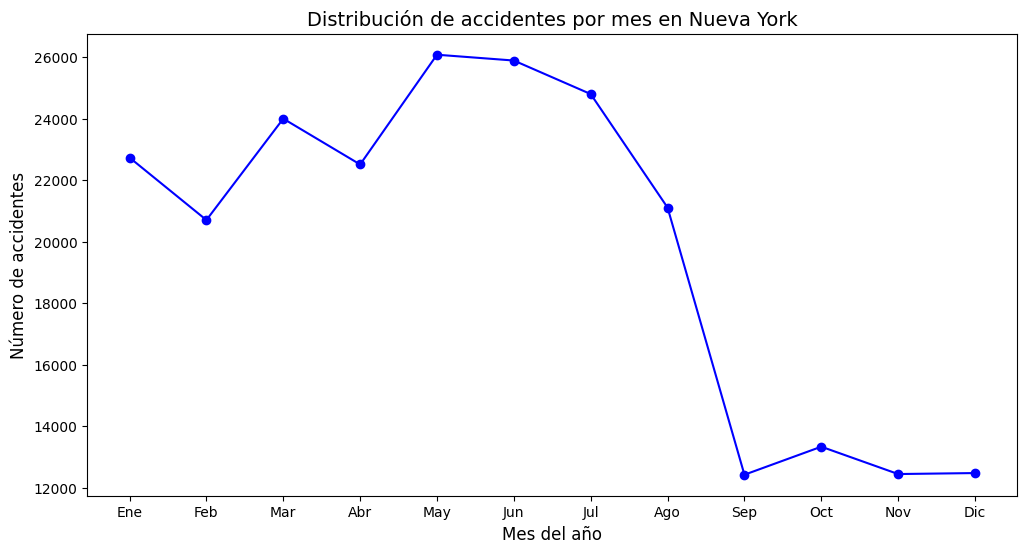

In [17]:
#Solución propuesta

# Convertir la columna DATE a formato datetime y extraer el mes
df["DATE"] = pd.to_datetime(df["DATE"], format="%m/%d/%Y", errors="coerce")
df["MONTH"] = df["DATE"].dt.month  # Extraer el número de mes

# Contar la cantidad de accidentes por mes
accidents_per_month = df["MONTH"].value_counts().sort_index()

# Graficar la distribución de accidentes por mes
plt.figure(figsize=(12,6))
plt.plot(accidents_per_month.index, accidents_per_month.values, marker='o', linestyle='-', color='b')

# Configurar etiquetas y título
plt.xlabel("Mes del año", fontsize=12)
plt.ylabel("Número de accidentes", fontsize=12)
plt.title("Distribución de accidentes por mes en Nueva York", fontsize=14)
plt.xticks(range(1, 13), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])

# Mostrar el gráfico
plt.show()


El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

📉 Análisis de Accidentes por Mes

El gráfico muestra la variación de accidentes a lo largo del año en Nueva York.

📌 Meses con menor número de accidentes:
Septiembre (12,425 accidentes)
Noviembre (12,447 accidentes)
Diciembre (12,479 accidentes)


🧐 Posibles razones detrás de esta tendencia:
🔻 Menos actividad en la ciudad:

En septiembre, hay una reducción en el tráfico debido a la transición entre vacaciones y el inicio de actividades escolares/laborales.
En noviembre y diciembre, festivos como Acción de Gracias y Navidad pueden reducir el tránsito diario, ya que muchas personas viajan fuera de la ciudad o trabajan menos días.
❄️ Condiciones climáticas:

En meses fríos como noviembre y diciembre, la gente tiende a conducir con mayor precaución o evitar salir innecesariamente.
Se pueden implementar más medidas de seguridad vial durante el invierno.
🚦 Posibles regulaciones de tráfico:

Programas de reducción de accidentes pueden haber sido más efectivos en estos meses.


### Exjercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

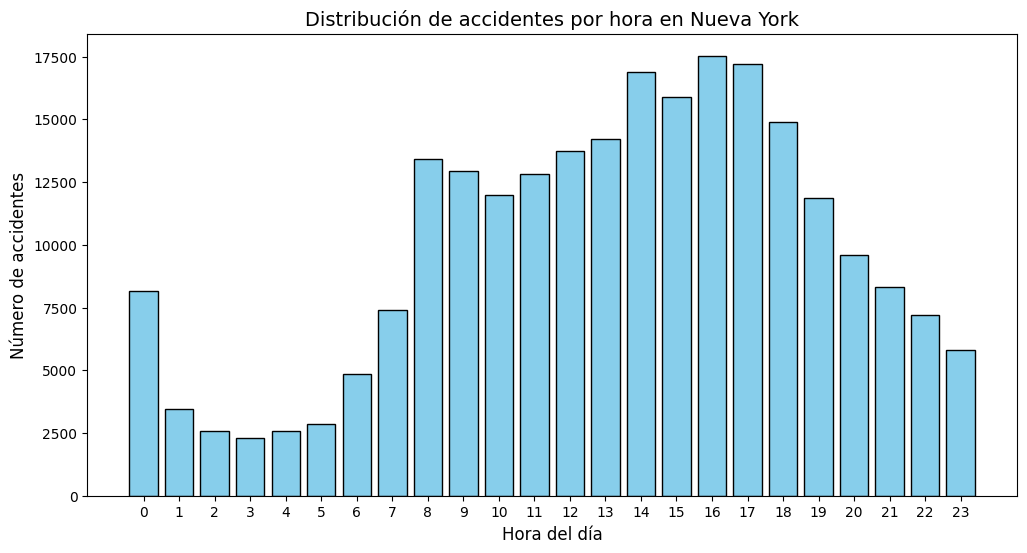

In [18]:
# Solución propuesta
# Convertir la columna TIME en formato datetime y extraer la hora
df["TIME"] = pd.to_datetime(df["TIME"], format="%H:%M", errors="coerce")
df["HOUR"] = df["TIME"].dt.hour  # Extraer la hora del día

# Contar la cantidad de accidentes por hora
accidents_per_hour = df["HOUR"].value_counts().sort_index()

# Graficar la distribución de accidentes por hora del día
plt.figure(figsize=(12,6))
plt.bar(accidents_per_hour.index, accidents_per_hour.values, color='skyblue', edgecolor='black')

# Configurar etiquetas y título
plt.xlabel("Hora del día", fontsize=12)
plt.ylabel("Número de accidentes", fontsize=12)
plt.title("Distribución de accidentes por hora en Nueva York", fontsize=14)
plt.xticks(range(0, 24))  # Asegurar que todas las horas se muestren correctamente

# Mostrar el gráfico
plt.show()

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

El análisis de accidentes por hora, sin considerar fecha y ubicación, ignora factores clave que afectan la siniestralidad vial. No contempla variaciones diarias ni estacionales, omitiendo diferencias entre días laborables y festivos. Tampoco distingue entre zonas de alto y bajo tráfico, lo que impide identificar puntos críticos. Además, excluye causas como exceso de velocidad o distracción. Para mejorar el enfoque, se recomienda segmentar por día, distrito y factores contribuyentes, permitiendo decisiones basadas en datos más precisos.

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

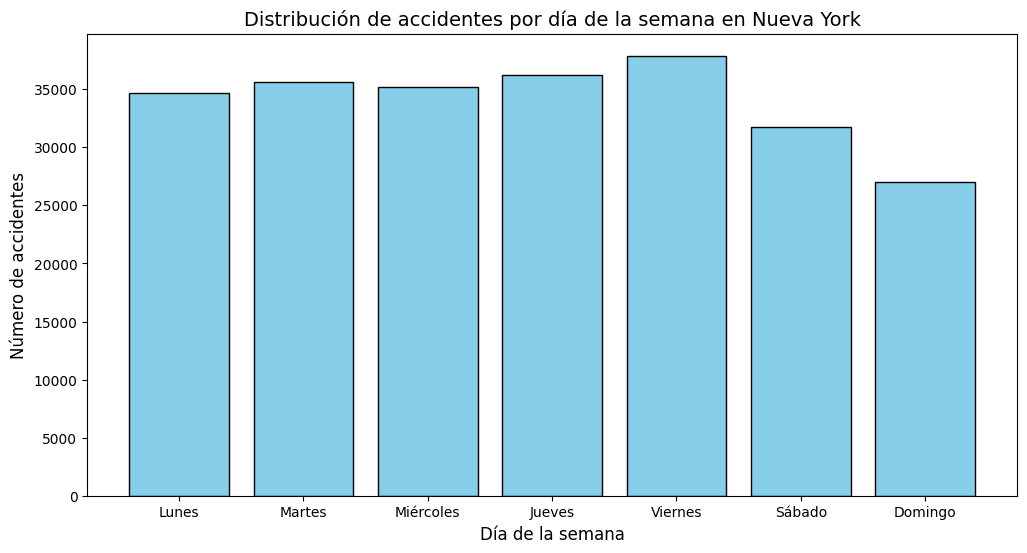

In [20]:
# Solución propuesta
# Extraer el día de la semana (Lunes=0, Domingo=6)
df["DAY_OF_WEEK"] = df["DATE"].dt.weekday

# Contar la cantidad de accidentes por día de la semana
accidents_per_day = df["DAY_OF_WEEK"].value_counts().sort_index()

# Nombres de los días de la semana
days_labels = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

# Graficar la distribución de accidentes por día de la semana
plt.figure(figsize=(12,6))
plt.bar(days_labels, accidents_per_day.values, color='skyblue', edgecolor='black')

# Configurar etiquetas y título
plt.xlabel("Día de la semana", fontsize=12)
plt.ylabel("Número de accidentes", fontsize=12)
plt.title("Distribución de accidentes por día de la semana en Nueva York", fontsize=14)

# Mostrar el gráfico
plt.show()


### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

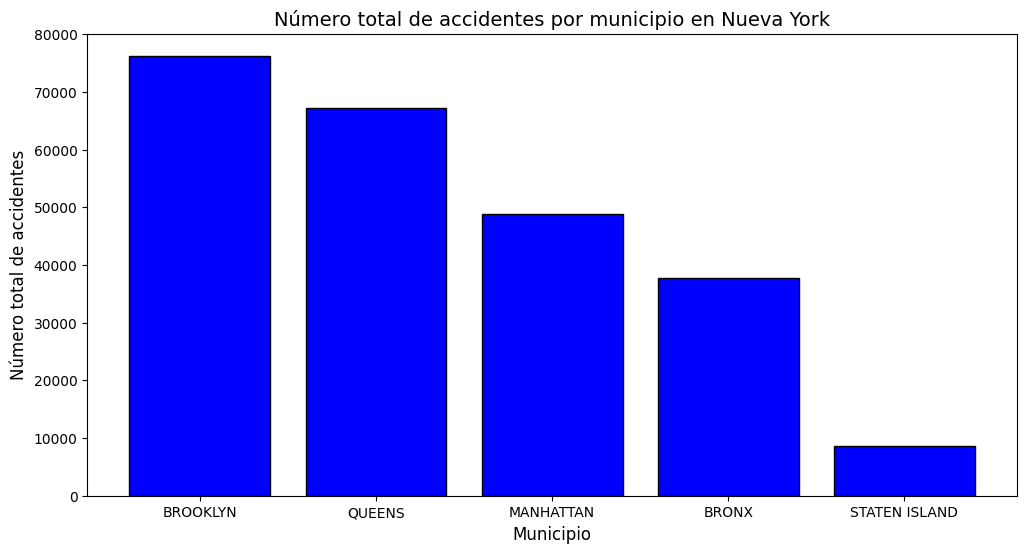

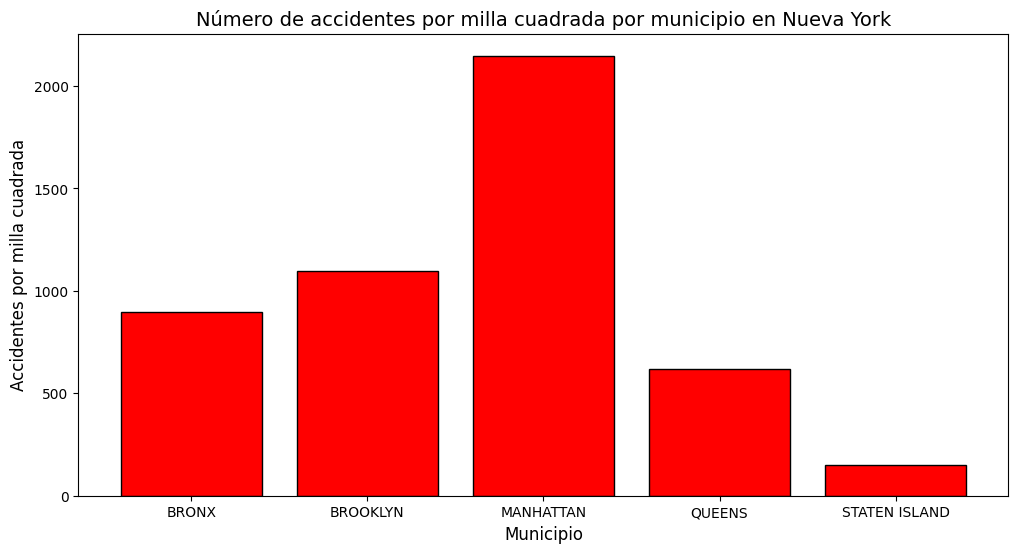

In [21]:
# Solución propuesta
# Contar el número total de accidentes por municipio
accidents_per_borough = df["BOROUGH"].value_counts()

# Definir la superficie en millas cuadradas de cada municipio de Nueva York
borough_area = {
    "BRONX": 42.0,
    "BROOKLYN": 69.4,
    "MANHATTAN": 22.7,
    "QUEENS": 108.7,
    "STATEN ISLAND": 57.5
}

# Calcular accidentes por milla cuadrada
accidents_per_sq_mile = {b: accidents_per_borough[b] / borough_area[b] for b in borough_area.keys() if b in accidents_per_borough}

# 📌 Gráfico 1: Número total de accidentes por municipio
plt.figure(figsize=(12,6))
plt.bar(accidents_per_borough.index, accidents_per_borough.values, color='blue', edgecolor='black')

plt.xlabel("Municipio", fontsize=12)
plt.ylabel("Número total de accidentes", fontsize=12)
plt.title("Número total de accidentes por municipio en Nueva York", fontsize=14)
plt.show()

# 📌 Gráfico 2: Accidentes por milla cuadrada por municipio
boroughs = list(accidents_per_sq_mile.keys())
accidents_density = list(accidents_per_sq_mile.values())

plt.figure(figsize=(12,6))
plt.bar(boroughs, accidents_density, color='red', edgecolor='black')

plt.xlabel("Municipio", fontsize=12)
plt.ylabel("Accidentes por milla cuadrada", fontsize=12)
plt.title("Número de accidentes por milla cuadrada por municipio en Nueva York", fontsize=14)
plt.show()


Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

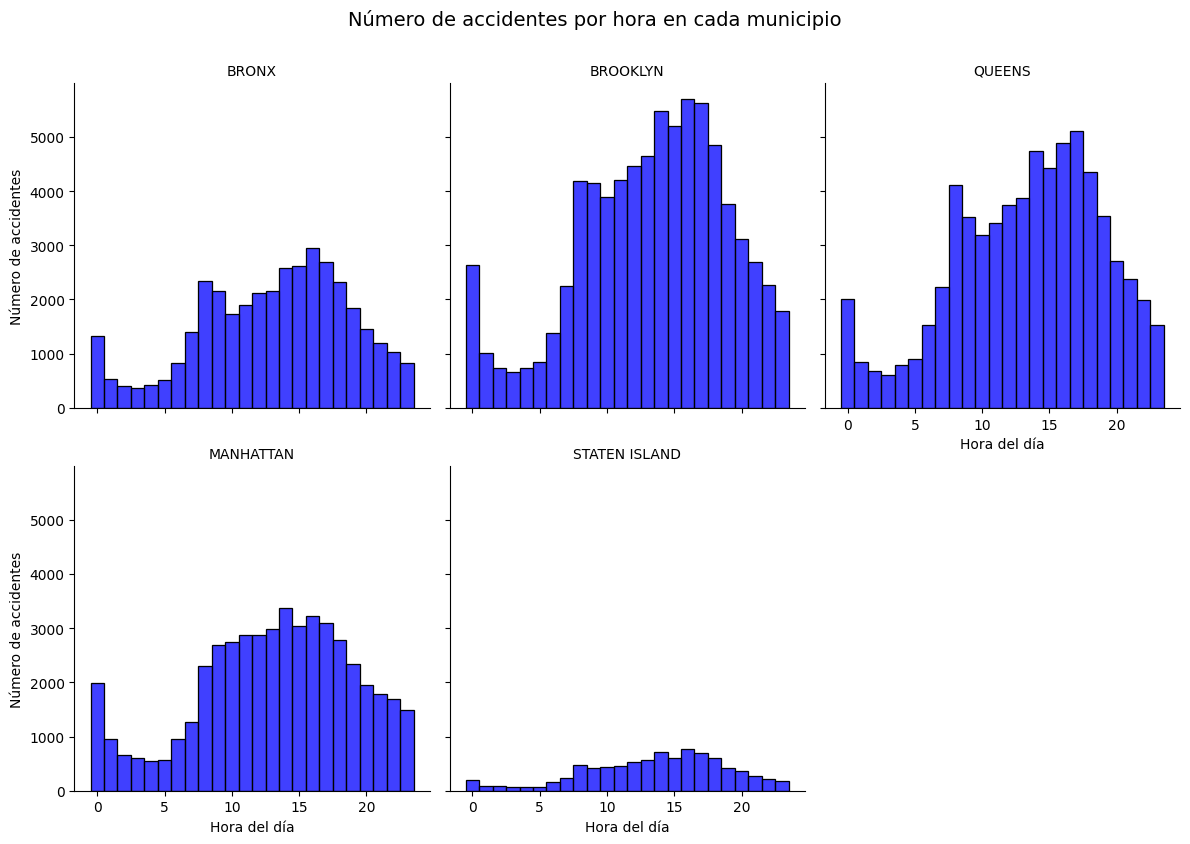

In [23]:
# Solución propuesta
# Filtrar solo los datos con municipios válidos
df_valid_boroughs = df[df["BOROUGH"].notna()]

# Crear el objeto FacetGrid con Seaborn
g = sns.FacetGrid(df_valid_boroughs, col="BOROUGH", col_wrap=3, height=4, sharex=True, sharey=True)

# Mapear los datos al gráfico de barras por hora
g.map(sns.histplot, "HOUR", bins=24, discrete=True, color="blue")

# Ajustar etiquetas y título
g.set_axis_labels("Hora del día", "Número de accidentes")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Número de accidentes por hora en cada municipio", fontsize=14, y=1.05)

# Mostrar el gráfico
plt.show()

**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

El análisis revela que el número de accidentes varía significativamente según la hora y el municipio.

En Manhattan, los accidentes son más frecuentes en horas pico (8-10 AM y 5-7 PM), reflejando alta movilidad laboral. En Brooklyn y Queens, los patrones son más dispersos, con un aumento en la tarde y noche. Staten Island presenta menor siniestralidad, pero con picos más localizados. Esto sugiere que las estrategias de prevención deben adaptarse a cada distrito, enfocándose en horas críticas específicas según el flujo vehicular y peatonal.

Un enfoque segmentado optimizaría la seguridad vial. 🚦📊

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

In [24]:
# Solución propuesta
# Seleccionar las columnas de factores contribuyentes
contributing_factors_cols = [
    "CONTRIBUTING FACTOR VEHICLE 1", "CONTRIBUTING FACTOR VEHICLE 2",
    "CONTRIBUTING FACTOR VEHICLE 3", "CONTRIBUTING FACTOR VEHICLE 4",
    "CONTRIBUTING FACTOR VEHICLE 5"
]

# Concatenar todas las columnas de factores en una sola serie, conservando los índices
contributing_factors = pd.concat([df[col] for col in contributing_factors_cols], axis=0).reset_index(drop=True)

# Eliminar valores nulos y factores "Unspecified" para obtener solo causas reales
contributing_factors = contributing_factors[contributing_factors.notna()]
contributing_factors = contributing_factors[contributing_factors != "Unspecified"]

# Contar la frecuencia de cada factor contribuyente
factor_counts = contributing_factors.value_counts().reset_index()
factor_counts.columns = ["Factor Contribuyente", "Número de Accidentes"]

# Mostrar los 10 factores más comunes
print(factor_counts.head(10))


             Factor Contribuyente  Número de Accidentes
0  Driver Inattention/Distraction                 72203
1   Failure to Yield Right-of-Way                 20413
2           Following Too Closely                 17909
3                Backing Unsafely                 15068
4             Passing Too Closely                 13378
5  Passing or Lane Usage Improper                 12953
6                 Other Vehicular                 11093
7            Unsafe Lane Changing                  6986
8              Turning Improperly                  6798
9     Traffic Control Disregarded                  5146


### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

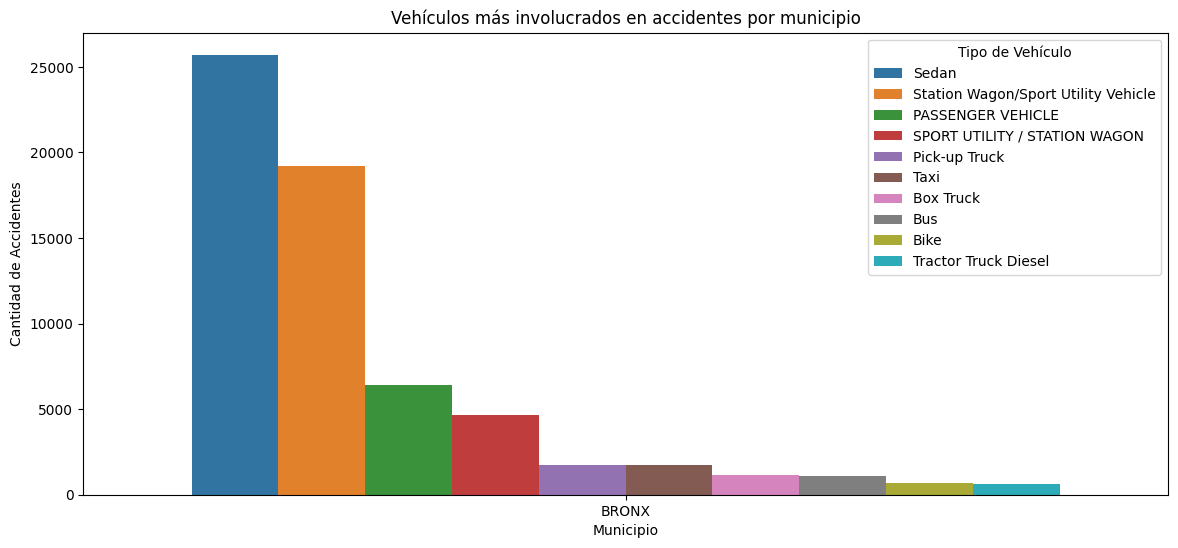

In [25]:
# Solución propuesta
# Seleccionar las columnas de tipos de vehículos involucrados
vehicle_type_cols = [
    "VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2",
    "VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4",
    "VEHICLE TYPE CODE 5"
]

# Expandir los tipos de vehículos asociados a cada accidente junto con su municipio
df_expanded = pd.melt(df, id_vars=["BOROUGH"], value_vars=vehicle_type_cols, var_name="Vehicle_Column", value_name="Vehicle_Type")

# Eliminar valores nulos y vehículos etiquetados como "Unknown"
df_expanded = df_expanded[df_expanded["Vehicle_Type"].notna()]
df_expanded = df_expanded[df_expanded["Vehicle_Type"] != "Unknown"]

# Contar la frecuencia de cada tipo de vehículo por municipio
vehicle_counts_per_borough = df_expanded.groupby(["BOROUGH", "Vehicle_Type"]).size().reset_index(name="Count")

# Ordenar por municipio y cantidad de accidentes
vehicle_counts_per_borough = vehicle_counts_per_borough.sort_values(by=["BOROUGH", "Count"], ascending=[True, False])

# 📊 Visualizar los 10 tipos de vehículos más comunes en accidentes por municipio
plt.figure(figsize=(14,6))
sns.barplot(data=vehicle_counts_per_borough.head(10), x="BOROUGH", y="Count", hue="Vehicle_Type", dodge=True)
plt.xlabel("Municipio")
plt.ylabel("Cantidad de Accidentes")
plt.title("Vehículos más involucrados en accidentes por municipio")
plt.legend(title="Tipo de Vehículo", bbox_to_anchor=(1,1))
plt.show()


### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [ ] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

In [26]:
# Solución propuesta
# Filtrar los datos para el primer trimestre de 2019
df_2019_Q1 = df[(df["DATE"] >= "2019-01-01") & (df["DATE"] <= "2019-03-31")]

# Filtrar los accidentes donde hubo peatones o ciclistas heridos o fallecidos
df_ped_cyclists_2019_Q1 = df_2019_Q1[
    (df_2019_Q1["NUMBER OF PEDESTRIANS INJURED"] > 0) |
    (df_2019_Q1["NUMBER OF PEDESTRIANS KILLED"] > 0) |
    (df_2019_Q1["NUMBER OF CYCLIST INJURED"] > 0) |
    (df_2019_Q1["NUMBER OF CYCLIST KILLED"] > 0)
]

# Seleccionar las columnas de factores contribuyentes
contributing_factors_cols = [
    "CONTRIBUTING FACTOR VEHICLE 1", "CONTRIBUTING FACTOR VEHICLE 2",
    "CONTRIBUTING FACTOR VEHICLE 3", "CONTRIBUTING FACTOR VEHICLE 4",
    "CONTRIBUTING FACTOR VEHICLE 5"
]

# Concatenar todas las columnas de factores contribuyentes en una sola serie
contributing_factors_ped_cyclists = pd.concat(
    [df_ped_cyclists_2019_Q1[col] for col in contributing_factors_cols], axis=0
).reset_index(drop=True)

# Eliminar valores nulos y "Unspecified"
contributing_factors_ped_cyclists = contributing_factors_ped_cyclists[contributing_factors_ped_cyclists.notna()]
contributing_factors_ped_cyclists = contributing_factors_ped_cyclists[contributing_factors_ped_cyclists != "Unspecified"]

# Contar la frecuencia de cada factor contribuyente en accidentes con peatones y ciclistas
factor_counts_ped_cyclists = contributing_factors_ped_cyclists.value_counts().reset_index()
factor_counts_ped_cyclists.columns = ["Factor Contribuyente", "Número de Accidentes"]

# Mostrar los factores más comunes de accidentes para peatones y ciclistas en Q1 2019
print(factor_counts_ped_cyclists.head(10))

                                Factor Contribuyente  Número de Accidentes
0                     Driver Inattention/Distraction                   720
1                      Failure to Yield Right-of-Way                   603
2  Pedestrian/Bicyclist/Other Pedestrian Error/Co...                   139
3                                   Backing Unsafely                    82
4                            View Obstructed/Limited                    55
5                        Traffic Control Disregarded                    52
6                     Passing or Lane Usage Improper                    36
7                                       Unsafe Speed                    28
8                                    Other Vehicular                    27
9                                 Turning Improperly                    21


<ipython-input-30-2ad92deda7af>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_factors, x="Número de Accidentes", y="Factor Contribuyente", palette="Reds_r")


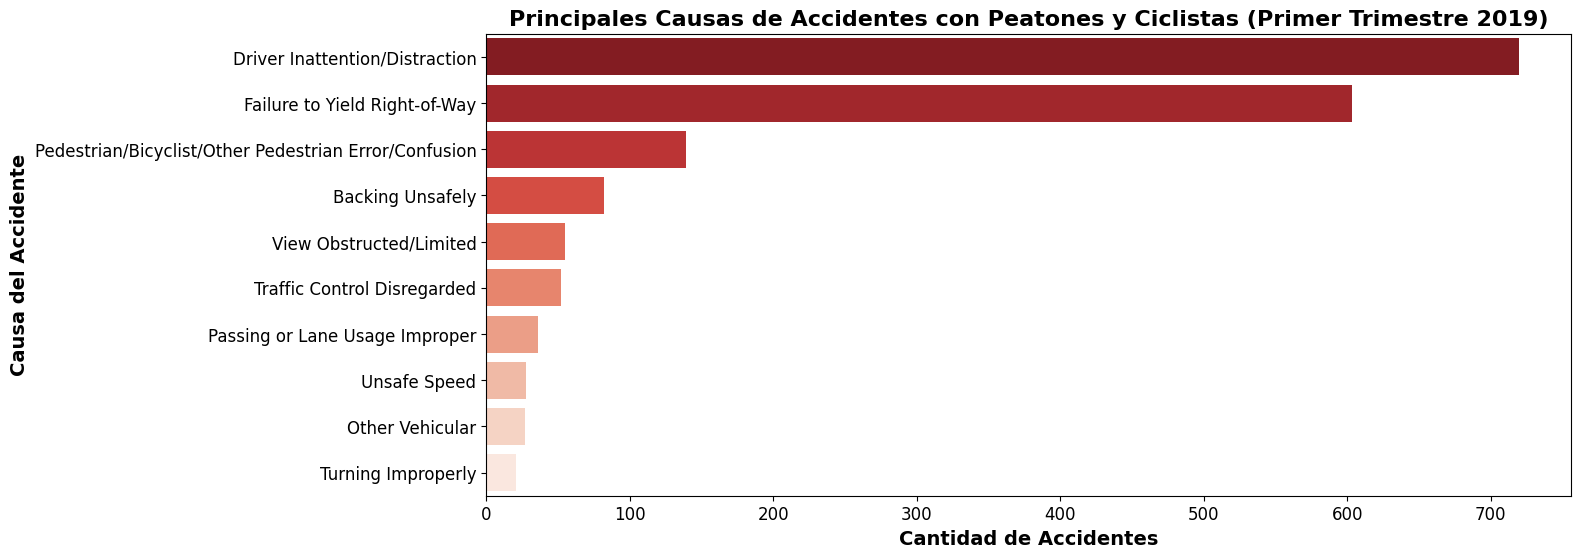

In [30]:
#Gráfico

# Tomar los 10 factores más comunes
top_factors = factor_counts_ped_cyclists.head(10)

# Crear un gráfico de barras
plt.figure(figsize=(14,6))
sns.barplot(data=top_factors, x="Número de Accidentes", y="Factor Contribuyente", palette="Reds_r")

# Configurar etiquetas y título en español
plt.xlabel("Cantidad de Accidentes", fontsize=14, fontweight='bold')
plt.ylabel("Causa del Accidente", fontsize=14, fontweight='bold')
plt.title("Principales Causas de Accidentes con Peatones y Ciclistas (Primer Trimestre 2019)", fontsize=16, fontweight='bold')

# Ajustar tamaño de las etiquetas para mejor lectura
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

El gráfico muestra que "Desatención/Distraído" y "No ceder el paso" son las principales causas de accidentes con peatones y ciclistas en el primer trimestre de 2019. Esto sugiere que la falta de atención y la imprudencia al cruzar intersecciones son los factores más críticos. También destaca el impacto de errores de peatones/ciclistas y conducción en reversa insegura. Para mitigar estos riesgos, se deben implementar campañas de concienciación, mejorar la señalización en zonas críticas y reforzar la vigilancia en intersecciones con alta incidencia de accidentes.

### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

<ipython-input-31-3d0948425477>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_vehicle_deaths, x="TOTAL_DEATHS", y="Vehicle_Type", palette="Reds_r")


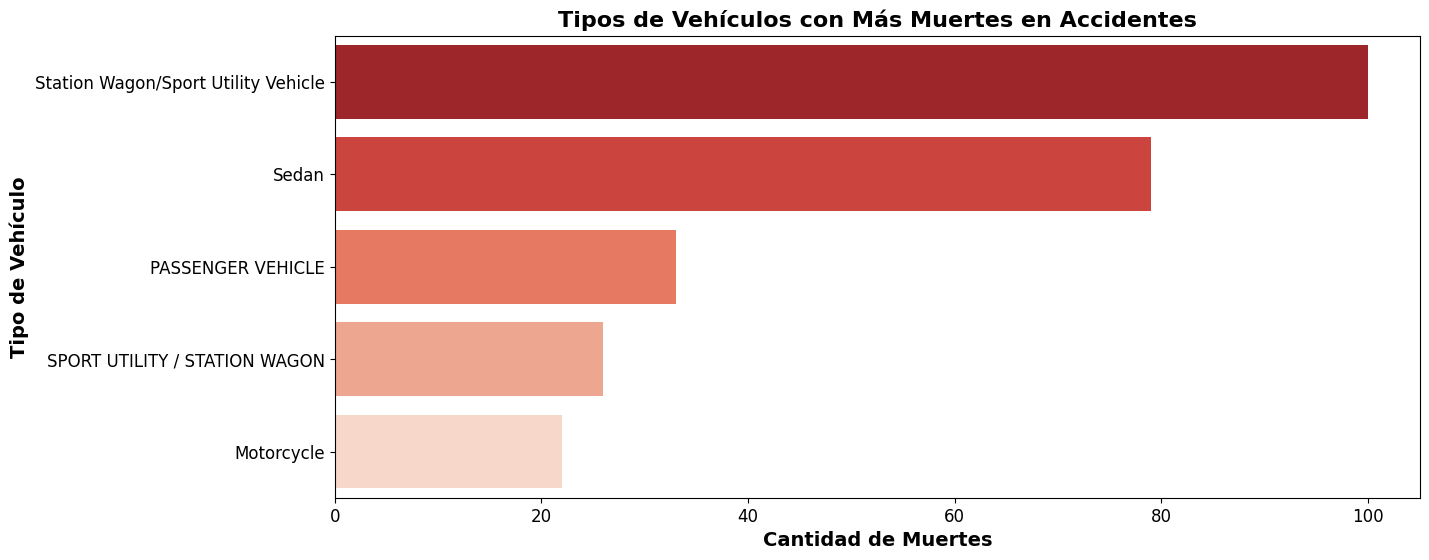

In [31]:
# Solución propuesta


# Crear una nueva columna con el número total de muertes en cada accidente
df["TOTAL_DEATHS"] = (
    df["NUMBER OF PEDESTRIANS KILLED"] +
    df["NUMBER OF CYCLIST KILLED"] +
    df["NUMBER OF MOTORIST KILLED"]
)

# Seleccionar las columnas de tipos de vehículos involucrados
vehicle_type_cols = [
    "VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2",
    "VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4",
    "VEHICLE TYPE CODE 5"
]

# Expandir los tipos de vehículos asociados a cada accidente junto con el número de muertes
df_expanded = pd.melt(df, id_vars=["TOTAL_DEATHS"], value_vars=vehicle_type_cols, var_name="Vehicle_Column", value_name="Vehicle_Type")

# Eliminar valores nulos y vehículos etiquetados como "Unknown"
df_expanded = df_expanded[df_expanded["Vehicle_Type"].notna()]
df_expanded = df_expanded[df_expanded["Vehicle_Type"] != "Unknown"]

# Sumar el número total de muertes por tipo de vehículo
vehicle_death_counts = df_expanded.groupby("Vehicle_Type")["TOTAL_DEATHS"].sum().reset_index()

# Ordenar por el número de muertes y seleccionar los 5 principales
top_5_vehicle_deaths = vehicle_death_counts.sort_values(by="TOTAL_DEATHS", ascending=False).head(5)

# Crear un gráfico de barras
plt.figure(figsize=(14,6))
sns.barplot(data=top_5_vehicle_deaths, x="TOTAL_DEATHS", y="Vehicle_Type", palette="Reds_r")

# Configurar etiquetas y título en español
plt.xlabel("Cantidad de Muertes", fontsize=14, fontweight='bold')
plt.ylabel("Tipo de Vehículo", fontsize=14, fontweight='bold')
plt.title("Tipos de Vehículos con Más Muertes en Accidentes", fontsize=16, fontweight='bold')

# Ajustar tamaño de las etiquetas para mejor lectura
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()
